## Import Libraries ##

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data exploration ##

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

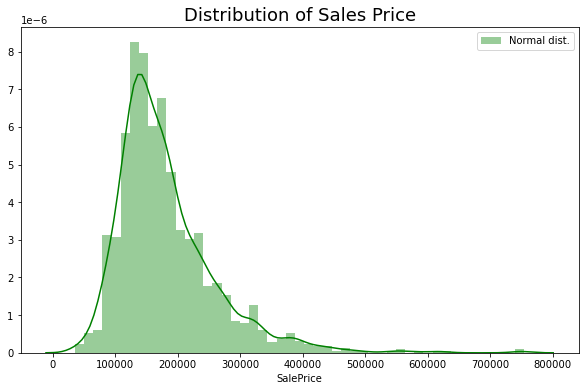

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(train['SalePrice'], color='g')
plt.legend(['Normal dist.'])
plt.title('Distribution of Sales Price', fontsize=18)
plt.show() 

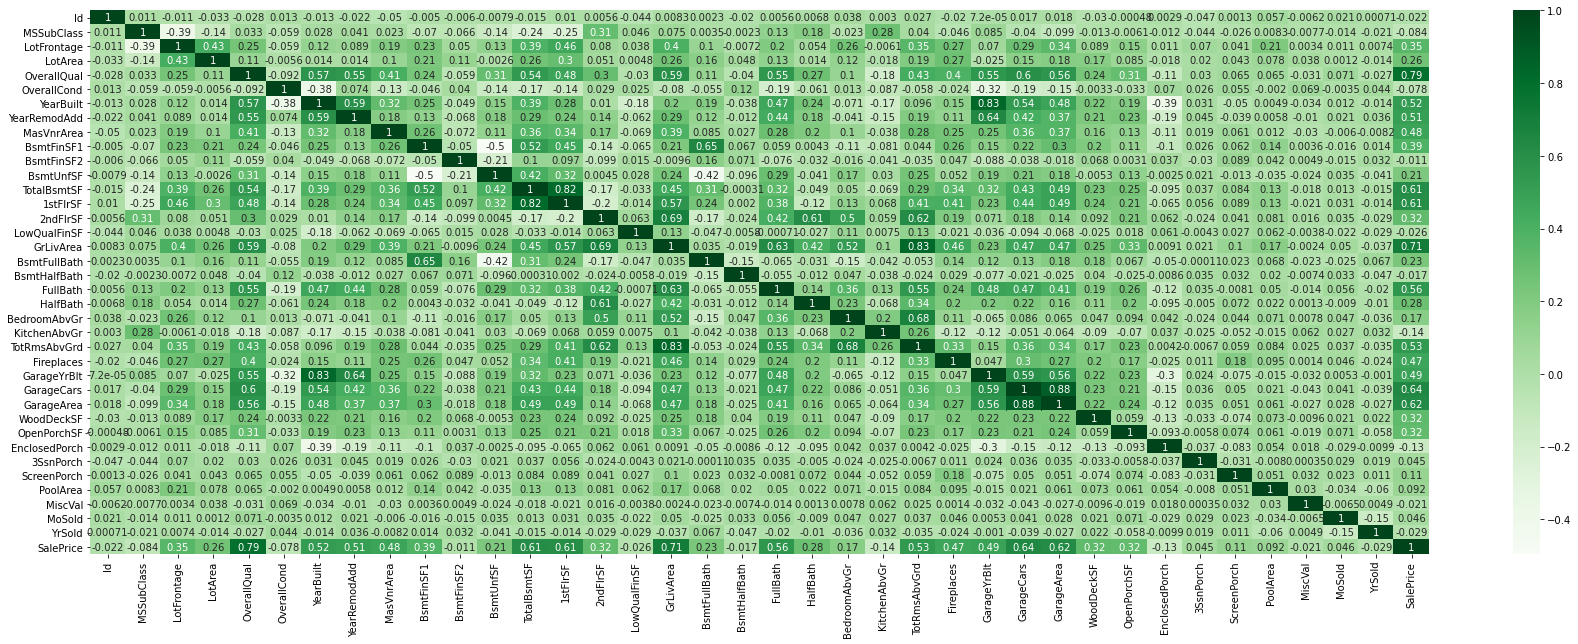

In [8]:
plt.figure(figsize=(30,10))
sns.heatmap(train.corr(),cmap='Greens',annot=True)
plt.show()

#### Take the most relevant characteristics for training ####

In [9]:
corr = train.corr()
top_corr_features = corr.index[abs(corr['SalePrice'])>0.5]
top_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

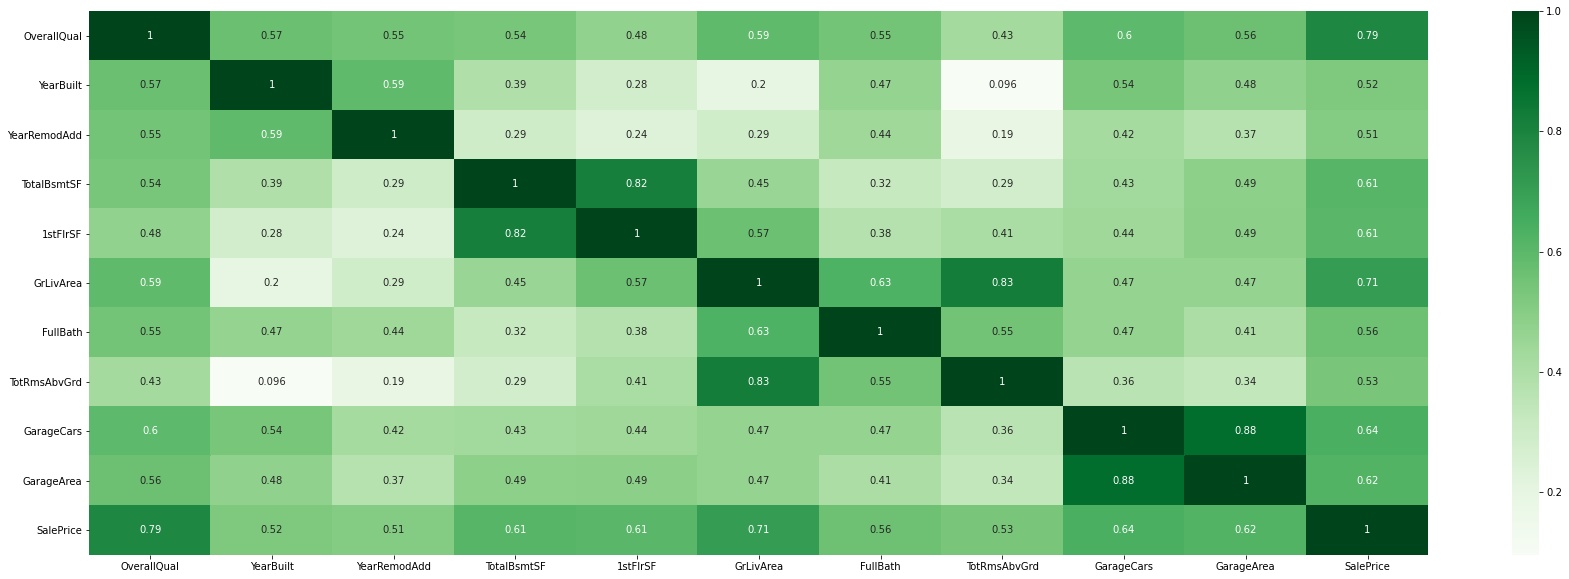

In [10]:
plt.figure(figsize=(30,10))
sns.heatmap(train[top_corr_features].corr(),cmap='Greens',annot=True)
plt.show()

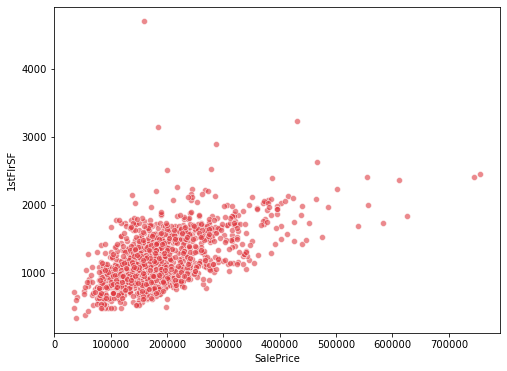

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SalePrice',y='1stFlrSF',data=train , color="#DF3A41", alpha=0.6)
plt.show()

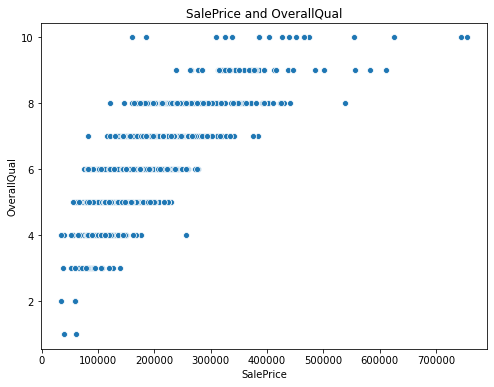

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='SalePrice',y='OverallQual', data=train)
plt.title('SalePrice and OverallQual')
plt.show()

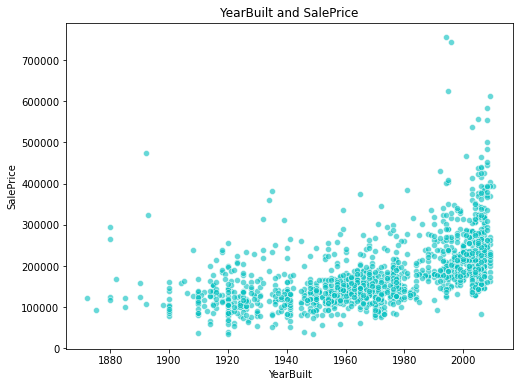

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearBuilt',y='SalePrice', data=train,color='c', alpha=0.6)
plt.title('YearBuilt and SalePrice')
plt.show()

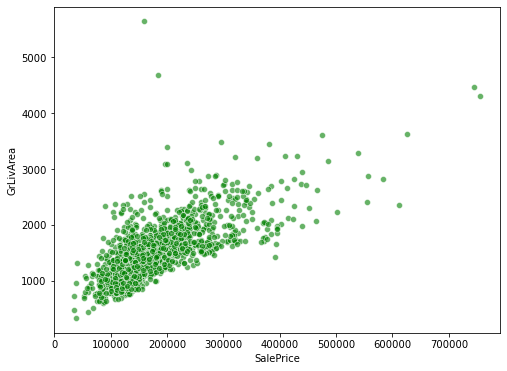

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'SalePrice', y='GrLivArea',color='g', data=train, alpha=0.6)
plt.show()

#### Clean data ####

In [15]:
train = train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]
test = test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]

#### Miss data ####

In [16]:
total_nan = train.isnull().sum().sort_values(ascending=False)
missi_data = pd.concat([total_nan], axis=1, keys=['Total'])
missi_data.head(25)

,Total
SalePrice,0
GarageArea,0
GarageCars,0
TotRmsAbvGrd,0
FullBath,0
GrLivArea,0
1stFlrSF,0
TotalBsmtSF,0
YearRemodAdd,0
YearBuilt,0


In [17]:
total_nan = test.isnull().sum().sort_values(ascending=False)
missi_data = pd.concat([total_nan], axis=1, keys=['Total'])
missi_data.head(25)

,Total
GarageArea,1
GarageCars,1
TotalBsmtSF,1
TotRmsAbvGrd,0
FullBath,0
GrLivArea,0
1stFlrSF,0
YearRemodAdd,0
YearBuilt,0
OverallQual,0


In [18]:
test['GarageArea'] = test['GarageArea'].fillna(train['GarageArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(train['GarageCars'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())

In [19]:
total_nan = test.isnull().sum().sort_values(ascending=False)
missi_data = pd.concat([total_nan], axis=1, keys=['Total'])
missi_data.head(25)

,Total
GarageArea,0
GarageCars,0
TotRmsAbvGrd,0
FullBath,0
GrLivArea,0
1stFlrSF,0
TotalBsmtSF,0
YearRemodAdd,0
YearBuilt,0
OverallQual,0


#### Search categorical data ####

In [20]:
categorical_train = train.dtypes==object
categorical_train

OverallQual     False
YearBuilt       False
YearRemodAdd    False
TotalBsmtSF     False
1stFlrSF        False
GrLivArea       False
FullBath        False
TotRmsAbvGrd    False
GarageCars      False
GarageArea      False
SalePrice       False
dtype: bool

In [21]:
categorical_test = test.dtypes==object
categorical_test

OverallQual     False
YearBuilt       False
YearRemodAdd    False
TotalBsmtSF     False
1stFlrSF        False
GrLivArea       False
FullBath        False
TotRmsAbvGrd    False
GarageCars      False
GarageArea      False
dtype: bool

## Create model ##

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.2, random_state=1)

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

std_X = StandardScaler()
std_Y = StandardScaler()
X_train = std_X.fit_transform(X_train)
X_test = std_X.fit_transform(X_test)
y_train = std_Y.fit_transform(y_train)
y_test = std_Y.fit_transform(y_test)

tree = RandomForestRegressor(n_estimators=500 ,random_state=0)
tree.fit(X_train,y_train.ravel())

pred = tree.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, pred))
print('Score train', tree.score(X_train,y_train))
print('Score test', tree.score(X_test,y_test))

MSE: 0.127318095291346
Score train 0.9732960392666276
Score test 0.872681904708654


## Results ##

In [23]:
take_id = pd.read_csv('test.csv')
Id = take_id['Id']
take_id = pd.DataFrame(Id, columns=['Id'])
test.shape

(1459, 10)

In [24]:
test = std_X.fit_transform(test)

In [25]:
test_pred = tree.predict(test)
test_pred= test_pred.reshape(-1,1)
test_pred.shape

(1459, 1)

In [26]:
test_pred_tree =std_Y.inverse_transform(test_pred)

In [27]:
test_pred_tree = pd.DataFrame(test_pred_tree, columns=['SalePrice'])


In [28]:
test_pred_tree.head()

,SalePrice
0,107415.008356
1,144186.756236
2,166305.034475
3,175092.980959
4,212749.228513


In [29]:
result = pd.concat([take_id,test_pred_tree], axis=1)

In [30]:
result.head()

,Id,SalePrice
0,1461,107415.008356
1,1462,144186.756236
2,1463,166305.034475
3,1464,175092.980959
4,1465,212749.228513


In [31]:
result.to_csv('submission.csv',index=False)